# Analyze the Kinematics!

In [1]:
import uproot
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt
import pandas as pd
import textwrap
import awkward as ak

In [2]:
#open relevant files
Graviton = "mc.graviton.4lep.root"
graviton = uproot.open(Graviton)

Higgs = "mc_345060.ggH125_ZZ4lep.4lep.root"
higgs = uproot.open(Higgs)

In [3]:
def make_fig(xTitle="xTitle",yTitle="yTitle"):
    fig = plt.figure(figsize=(10,5))

    ax = plt.gca()
    ax.set_prop_cycle(color=['#002BFF','#A15FFF','#FF0061','#FF8913'])
    ax.set_xlabel(xTitle,fontsize=18,labelpad=6)
    ax.set_ylabel(yTitle,fontsize=18)
    ax.tick_params(labelsize=10, direction='out', length=8, width=2)
    ax.yaxis.offsetText.set_fontsize(10)
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15
    ax.tick_params(axis='both', which='major', labelsize=15)
    
    return fig, ax

In [4]:
titles = ['Complete Histogram']
ytitle = "Number of Leptons"

# Generate Datasets

Here I generate the datasets to make plots of them later - the only filter applied is that all events must be four lepton events.

In [5]:
#DataFrame creation for graviton
tree    = b'mini;1' 
lep_charge = ak.fromiter(graviton[tree].array(b'lep_charge'))

#Confirmation that all events are four particle events
print('Are all events in our dataset four lepton events?')
print(len(lep_charge) == len(lep_charge[lep_charge.counts==4]))

#make filters for only four lepton events
#start with filtering the lep_charge dataset
counts_filter = (lep_charge.counts==4)
lep_charge = lep_charge[counts_filter]
lep_charge_sum = lep_charge.sum()

#Z_pl=sum(lep_pt*sinh(lep_eta))
lep_pt = ak.fromiter(graviton[tree].array(b'lep_pt')*1e-3)
lep_pt = lep_pt[counts_filter]
sinh_lep_eta = ak.fromiter(np.sinh(graviton[tree].array(b'lep_eta')))
sinh_lep_eta = sinh_lep_eta[counts_filter]
prod =  lep_pt*sinh_lep_eta
pl = prod.sum()

#Sum lep types
lep_type = ak.fromiter(graviton[tree].array(b'lep_type'))
lep_type = lep_type[counts_filter]
leptons = lep_type.sum()

#Z_pt=sqrt((sum(lep_pt*cos(lep_phi)))^2+(sum(lep_pt*sin(lep_phi)))^2)
cos_lep_phi = ak.fromiter(np.cos(graviton[tree].array(b'lep_phi')))
cos_lep_phi = cos_lep_phi[counts_filter]
sin_lep_phi = ak.fromiter(np.sin(graviton[tree].array(b'lep_phi')))
sin_lep_phi = sin_lep_phi[counts_filter]
prod1 = lep_pt * cos_lep_phi
prod2 = lep_pt * sin_lep_phi
pt = np.sqrt((prod1.sum())**2+(prod2.sum())**2)

px = prod1
phi = np.arccos(px/(np.sqrt((prod1)**2+(prod2)**2)))

eta = np.arcsinh(prod/(np.sqrt((prod1)**2+(prod2)**2)))

#Z_E=sum(lep_E)
Ebit = ak.fromiter(graviton[tree].array(b'lep_E')*1e-3)
Ebit = Ebit[counts_filter]
E = Ebit.sum()

y = 0.5*np.log((Ebit+prod)/(Ebit-prod))

#Missing transverse energy
met_et = graviton[tree].array(b'met_et')*1e-3
met_et = met_et[counts_filter]

#Store isTight values to filter later leptons 
#that don't pass the strictest requirements
lep_tight = ak.fromiter(graviton[tree].array(b'lep_isTightID'))
lep_tight = lep_tight[counts_filter]
lep_tight = lep_tight.sum()

#Invariant mass of the four leptons
#adds momentum component by component
InvMass = np.sqrt(E**2-pt**2-pl**2)

data = {'pl':pl,'pt':pt,'E':E,'InvMass':InvMass,'lep_type':leptons, 'MET':met_et, 'lep_tight':lep_tight, 
        'lep_charge':lep_charge_sum}

#store data before summing over leptons for individual lepton analysis
gravitonstoof = ak.fromiter(graviton[tree].array(b'lep_pt'))*1e-3
gravitonstoof2 = prod
gravitonstoof3 = Ebit
gravitonstoof4 = eta
gravitonstoof5 = px
gravitonstoof6 = phi
gravitonstoof7 = y
df_graviton = pd.DataFrame(data)

Are all events in our dataset four lepton events?
False


In [6]:
#DataFrame creation for higgs
tree    = b'mini;1' 
lep_charge = ak.fromiter(higgs[tree].array(b'lep_charge'))

#Confirmation that all events are four particle events
print('Are all events in our dataset four lepton events?')
print(len(lep_charge) == len(lep_charge[lep_charge.counts==4]))

#make filters for only four lepton events
#start with filtering the lep_charge dataset
counts_filter = (lep_charge.counts==4)
lep_charge = lep_charge[counts_filter]
lep_charge_sum = lep_charge.sum()

#Z_pl=sum(lep_pt*sinh(lep_eta))
lep_pt = ak.fromiter(higgs[tree].array(b'lep_pt')*1e-3)
lep_pt = lep_pt[counts_filter]
sinh_lep_eta = ak.fromiter(np.sinh(higgs[tree].array(b'lep_eta')))
sinh_lep_eta = sinh_lep_eta[counts_filter]
prod =  lep_pt*sinh_lep_eta
pl = prod.sum()

#Sum lep types
lep_type = ak.fromiter(higgs[tree].array(b'lep_type'))
lep_type = lep_type[counts_filter]
leptons = lep_type.sum()

#Z_pt=sqrt((sum(lep_pt*cos(lep_phi)))^2+(sum(lep_pt*sin(lep_phi)))^2)
cos_lep_phi = ak.fromiter(np.cos(higgs[tree].array(b'lep_phi')))
cos_lep_phi = cos_lep_phi[counts_filter]
sin_lep_phi = ak.fromiter(np.sin(higgs[tree].array(b'lep_phi')))
sin_lep_phi = sin_lep_phi[counts_filter]
prod1 = lep_pt * cos_lep_phi
prod2 = lep_pt * sin_lep_phi
pt = np.sqrt((prod1.sum())**2+(prod2.sum())**2)

px = prod1
phi = np.arccos(px/(np.sqrt((prod1)**2+(prod2)**2)))

eta = np.arcsinh(prod/(np.sqrt((prod1)**2+(prod2)**2)))

#Z_E=sum(lep_E)
Ebit = ak.fromiter(higgs[tree].array(b'lep_E')*1e-3)
Ebit = Ebit[counts_filter]
E = Ebit.sum()

y = 0.5*np.log((Ebit+prod)/(Ebit-prod))

#Missing transverse energy
met_et = higgs[tree].array(b'met_et')*1e-3
met_et = met_et[counts_filter]

#Store isTight values to filter later leptons 
#that don't pass the strictest requirements
lep_tight = ak.fromiter(higgs[tree].array(b'lep_isTightID'))
lep_tight = lep_tight[counts_filter]
lep_tight = lep_tight.sum()

#Invariant mass of the four leptons
#adds momentum component by component
InvMass = np.sqrt(E**2-pt**2-pl**2)

data = {'pl':pl,'pt':pt,'E':E,'InvMass':InvMass,'lep_type':leptons, 'MET':met_et, 'lep_tight':lep_tight, 
        'lep_charge':lep_charge_sum}

#store data before summing over leptons for individual lepton analysis
higgsstoof = ak.fromiter(higgs[tree].array(b'lep_pt'))*1e-3
higgsstoof2 = prod
higgsstoof3 = Ebit
higgsstoof4 = eta
higgsstoof5 = px
higgsstoof6 = phi
higgsstoof7 = y
df_higgs = pd.DataFrame(data)

Are all events in our dataset four lepton events?
False


# Invariant Mass Plots

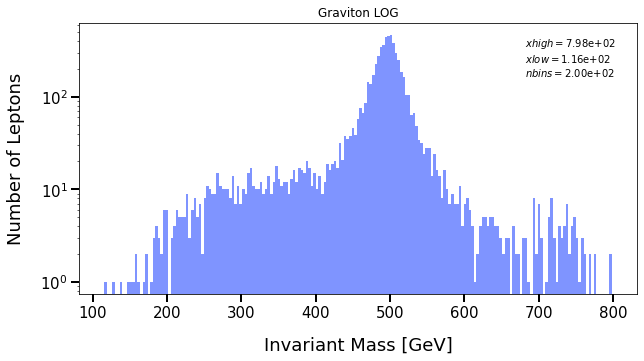

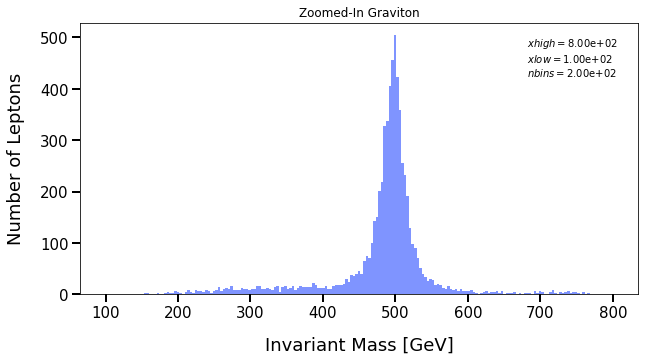

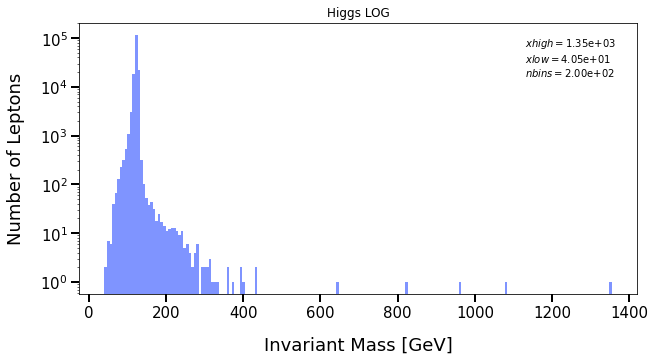

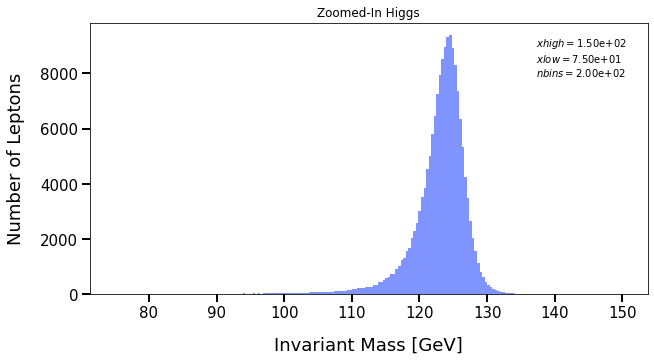

In [7]:
#Plot full distributions (semi-filtered data)
#Plotted on LOG SCALE PLOTS
#INVARIANT MASS

dataframes = [df_graviton,df_higgs]
titles = ["Graviton LOG","Higgs LOG"]
adj_titles = ["Zoomed-In Graviton","Zoomed-In Higgs"]
minlims = [100,75]
maxlims = [800,150]
binning=[200,200]

i=0
for df in dataframes:
        xtitle  = "Invariant Mass [GeV]"
        param = 'InvMass'
        fig,ax = make_fig(xTitle=xtitle,yTitle=ytitle)
        xlow = (df[param].min()-1)
        xhigh= (df[param].max()+1)
        nbins = 200
        bins  = np.linspace(xlow, xhigh, nbins)
        n, bins, patches = ax.hist(df[param], bins, alpha=0.5)
        textstr = '\n'.join((
        r'$xhigh=%.2f$'+"{:.2e}".format(xhigh),
        r'$xlow=%.2f$'+"{:.2e}".format(xlow),
        r'$nbins=%.2f$'+"{:.2e}".format(nbins)))
        ax.text(0.80, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top')
        ax.set_title(titles[i])
        plt.yscale('log')
        
        fig,ax = make_fig(xTitle=xtitle,yTitle=ytitle)
        xlow = minlims[i]
        xhigh= maxlims[i]
        nbins = binning[i]
        bins  = np.linspace(xlow, xhigh, nbins)
        n, bins, patches = ax.hist(df[param], bins, alpha=0.5)
        textstr = '\n'.join((
        r'$xhigh=%.2f$'+"{:.2e}".format(xhigh),
        r'$xlow=%.2f$'+"{:.2e}".format(xlow),
        r'$nbins=%.2f$'+"{:.2e}".format(nbins)))
        ax.text(0.80, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top')
        ax.set_title(adj_titles[i])

        i+=1
        

### Comments on InvMass Plots:

From the invariant mass plots, we see that we'd expect the invariant mass of the graviton to be around 500 GeV, whereas all other invariant mass peaks are at much lower values.

# Lepton pTs

[51.90546  41.430645 33.646713 ... 63.284214 52.538807 58.730095]


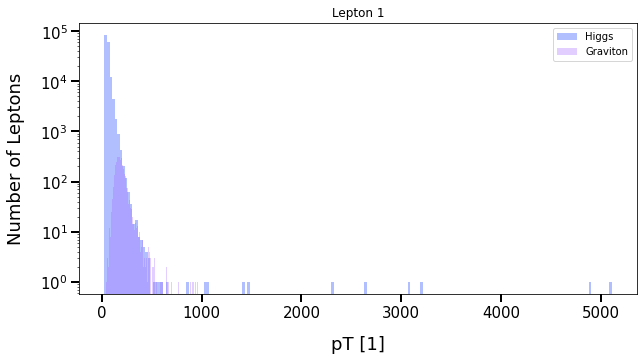

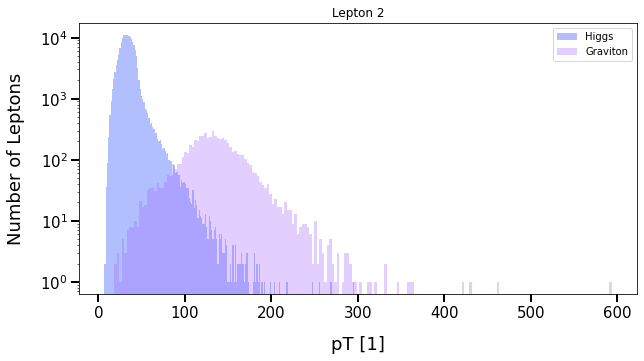

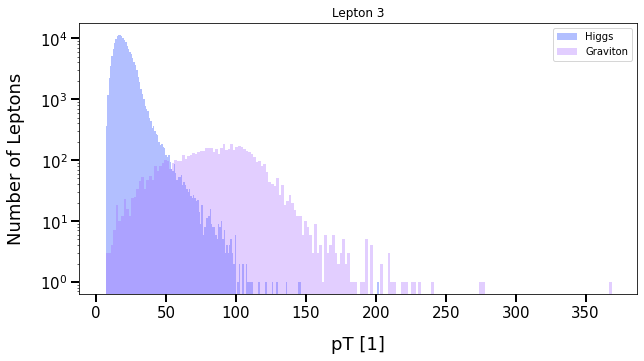

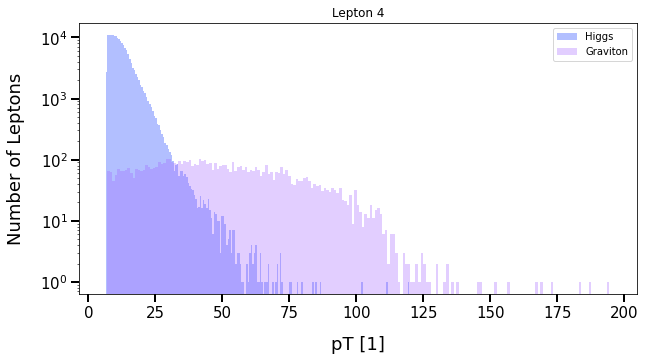

In [8]:
stuff = [higgsstoof,gravitonstoof]
labels = ['Higgs','Graviton']
titles = ["Lepton 1","Lepton 2","Lepton 3","Lepton 4"]
print(higgsstoof[:,0])
for i in range(4):
    xtitle  = "pT [1]"
    fig, ax = make_fig(xTitle=xtitle,yTitle=ytitle)
    j=0
    for thing in stuff:
        
        xlow = (thing[:,i].min()-1)
        xhigh= (thing[:,i].max()+1)
        nbins = 200
        bins  = np.linspace(xlow, xhigh, nbins)
        if j==4:
            n, bins, patches = ax.hist(thing[:,i], bins, alpha=0.7,color='k',label=labels[j])
        else:
            n, bins, patches = ax.hist(thing[:,i], bins, alpha=0.3,label=labels[j])
        textstr = '\n'.join((
        r'$xhigh=%.2f$'+"{:.2e}".format(xhigh),
        r'$xlow=%.2f$'+"{:.2e}".format(xlow),
        r'$nbins=%.2f$'+"{:.2e}".format(nbins)))
        if j==2:
            ax.text(0.01, 0.95, textstr, transform=ax.transAxes, fontsize=10,
                verticalalignment='top')
        ax.set_title(titles[i])
        plt.yscale('log')
        j+=1
    plt.legend()

### Comments on Lepton pT plots:
From these plots we see that we can make the following cuts:

\begin{itemize}
  \item The pT of the first lepton should be between (39,1000) GeV
  \item The pT of the second lepton should be between (18,400) GeV
  \item The pT of the third lepton should be between (0,250) GeV
  \item The pT of the fourth lepton should be between (0,150) GeV
\end{itemize}